<a href="https://colab.research.google.com/github/larrymoralez/ML-HW-3/blob/master/ML_HW_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import zipfile
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-19 20:31:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  84.4MB/s    in 0.8s    

2019-04-19 20:31:20 (84.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/cats_and_dogs_filtered'

train_data = os.path.join(dir, 'train')
val_data = os.path.join(dir, 'validation')

train_cats = os.path.join(train_data, 'cats')
train_dogs = os.path.join(train_data, 'dogs')
val_cats = os.path.join(val_data, 'cats')
val_dogs = os.path.join(val_data, 'dogs')

In [0]:
conv_base = VGG19(weights = 'imagenet',
              include_top=False, 
              input_shape=(150, 150, 3))

#model.summary()

#model.trainable = False

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.summary()

In [14]:
train_data_gen = ImageDataGenerator(
  featurewise_center = False,
  samplewise_center = False,
  featurewise_std_normalization = False,
  samplewise_std_normalization = False,
  rotation_range = 90,
  horizontal_flip = True,
  vertical_flip = True)

train_gen = train_data_gen.flow_from_directory(train_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

val_data_gen = ImageDataGenerator(rescale=1./255)

val_gen = val_data_gen.flow_from_directory(val_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(
    train_gen,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_gen,
    validation_steps=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25/25 [==============================] - 603s 24s/step - loss: 3.5860 - acc: 0.5960 - val_loss: 0.7357 - val_acc: 0.5350
Epoch 2/20
25/25 [==============================] - 600s 24s/step - loss: 2.0855 - acc: 0.6560 - val_loss: 0.7839 - val_acc: 0.4500
Epoch 3/20
25/25 [==============================] - 602s 24s/step - loss: 1.2899 - acc: 0.6540 - val_loss: 0.7579 - val_acc: 0.5200
Epoch 4/20
25/25 [==============================] - 601s 24s/step - loss: 0.9819 - acc: 0.6060 - val_loss: 0.7938 - val_acc: 0.4900
Epoch 5/20
25/25 [==============================] - 598s 24s/step - loss: 0.7572 - acc: 0.6420 - val_loss: 0.7654 - val_acc: 0.5000
Epoch 6/20
25/25 [==============================] - 607s 24s/step - loss: 0.7224 - acc: 0.6480 - val_loss: 0.7212 - val_acc: 0.5550
Epoch 7/20
25/25 [==============================] - 608s 24s/step - loss: 0.6877 - acc: 0.6380 - val_loss: 0.7394 - val_acc: 0.5050
Epoch 8/20
25/25 [==========

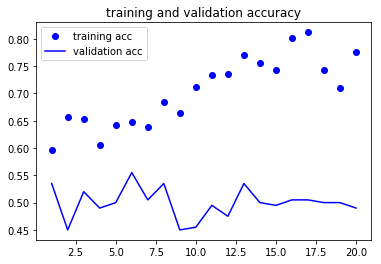

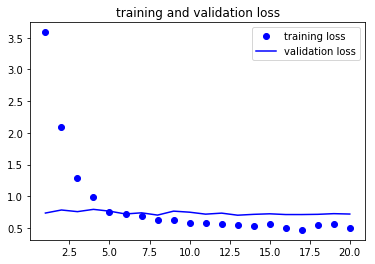

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [17]:
val_loss, val_acc = model.evaluate_generator(val_gen, steps=50)

print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.712123293876648
Validation accuracy: 0.49900000393390653
